In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/t2p0-customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
#Seaborn visualization
import random
import seaborn as sns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [ ]:
# Change to display items:
display_plot = True
display_print = True

# PLOTS
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# PLOTS and EDA over specified dataset and column
def stats_unique_values(data, column_name):
  column_rows = len(data[column_name])
  unique_values_count = len(data[column_name].unique())
  # Unique values
  if display_print == True:
      print(f"Column: {column_name} has {unique_values_count} unique values in {column_rows} rows\n")

  #Note, adjist data theshold, now is 500

  # FOR LOW VOLUME DATA
  if unique_values_count < 500:
      # extract data
      value_counts = data[column_name].value_counts().sort_values(ascending=False)
      max_value_length = max(len(str(value)) for value in value_counts.index)
      total_count = value_counts.sum()
      for value, count in value_counts.items():
          percentage = (count / total_count) * 100
          if display_print == True:
              print(f'{value:{max_value_length}}  {count} ({percentage:.2f}%)')
      if display_print == True:
          print("")
      # Display plot
      if display_plot == True:
          if pd.api.types.is_numeric_dtype(data[column_name]):
              plot_continuous_distribution(data , column_name)
          else:
              plot_categorical_distribution(data , column_name)
  # FOR HIGH VOLUME DATA
  else:
      random_numbers = [random.randint(0, unique_values_count-1) for _ in range(5)]
      if display_print == True:
          print("Samples:")
      for num in random_numbers:
          if display_print == True:
              print(data[column_name][num])
      if pd.api.types.is_numeric_dtype(data[column_name]):
          column_stats = data[column_name].describe()
          # Extract and print specific statistics
          mean = column_stats['mean']
          std = column_stats['std']
          min_value = column_stats['min']
          quartile_25 = column_stats['25%']
          median = column_stats['50%']
          quartile_75 = column_stats['75%']
          max_value = column_stats['max']
          if display_print == True:
              print(f"\nDescription:")
              print(f"mean:{mean}")
              print(f"std: {std}")
              print(f"min: {min_value}")
              print(f"25%: {quartile_25}")
              print(f"50%: {median}")
              print(f"75%: {quartile_75}")
              print(f"max: {max_value}")
      else:
          if display_print == True:
              print("\nThe column is not numeric.")
  if display_print == True:
      print(f"\nName: {column_name}, dtype: {data[column_name].dtype}")

  print(f"\n\n\n ---------------------------------------------")


# UNIQUES
def return_unique_values(df_aq, column_name):
    return df_aq[column_name].unique()

# GET COLUMN NAMES
def return_column_names(df_aq):
    return df_aq.columns

num_passengers
Column: num_passengers has 9 unique values in 50000 rows

1  31352 (62.70%)
2  12804 (25.61%)
3  2941 (5.88%)
4  1784 (3.57%)
5  561 (1.12%)
6  289 (0.58%)
7  114 (0.23%)
8  89 (0.18%)
9  66 (0.13%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: num_passengers, dtype: int64



 ---------------------------------------------
sales_channel
Column: sales_channel has 2 unique values in 50000 rows

Internet  44382 (88.76%)
Mobile    5618 (11.24%)


Name: sales_channel, dtype: object



 ---------------------------------------------
trip_type
Column: trip_type has 3 unique values in 50000 rows

RoundTrip   49497 (98.99%)
OneWay      387 (0.77%)
CircleTrip  116 (0.23%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: trip_type, dtype: object



 ---------------------------------------------
purchase_lead
Column: purchase_lead has 470 unique values in 50000 rows

  1  685 (1.37%)
  2  670 (1.34%)
  6  653 (1.31%)
  7  638 (1.28%)
  5  615 (1.23%)
 13  606 (1.21%)
  4  606 (1.21%)
  8  597 (1.19%)
  9  593 (1.19%)
 20  589 (1.18%)
 12  587 (1.17%)
  3  576 (1.15%)
 10  571 (1.14%)
 18  559 (1.12%)
 21  556 (1.11%)
 19  552 (1.10%)
 15  549 (1.10%)
 11  547 (1.09%)
 16  544 (1.09%)
 22  543 (1.09%)
 14  541 (1.08%)
 17  521 (1.04%)
 23  514 (1.03%)
 27  507 (1.01%)
 29  503 (1.01%)
 25  499 (1.00%)
 26  490 (0.98%)
 24  487 (0.97%)
 28  453 (0.91%)
 32  432 (0.86%)
 33  426 (0.85%)
 30  418 (0.84%)
 31  415 (0.83%)
 37  413 (0.83%)
 42  412 (0.82%)
 38  406 (0.81%)
 40  404 (0.81%)
 36  393 (0.79%)
 34  386 (0.77%)
 47  381 (0.76%)
 35  381 (0.76%)
 39  376 (0.75%)
 46  372 (0.74%)
  0  370 (0.74%)
 44  367 (0.73%)
 41  354 (0.71%)
 52  350 (0.70%)
 50  348 (0.70%)
 49  344 (0.69%)
 43  339 (0.

C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: purchase_lead, dtype: int64



 ---------------------------------------------
length_of_stay
Column: length_of_stay has 335 unique values in 50000 rows

  6  7757 (15.51%)
  5  7286 (14.57%)
  4  5655 (11.31%)
  3  2839 (5.68%)
 17  1849 (3.70%)
 21  1392 (2.78%)
 18  1356 (2.71%)
 22  1285 (2.57%)
 20  1285 (2.57%)
 19  1253 (2.51%)
 29  1040 (2.08%)
 23  941 (1.88%)
  2  866 (1.73%)
 28  851 (1.70%)
 30  793 (1.59%)
 27  768 (1.54%)
 24  765 (1.53%)
 25  650 (1.30%)
 31  634 (1.27%)
 26  600 (1.20%)
 32  456 (0.91%)
 33  421 (0.84%)
 34  394 (0.79%)
 35  383 (0.77%)
 36  373 (0.75%)
 37  284 (0.57%)
  1  261 (0.52%)
 38  249 (0.50%)
 41  249 (0.50%)
 42  230 (0.46%)
 40  217 (0.43%)
 39  213 (0.43%)
 43  205 (0.41%)
 89  197 (0.39%)
 44  177 (0.35%)
 88  173 (0.35%)
 90  168 (0.34%)
 45  167 (0.33%)
 91  158 (0.32%)
 61  155 (0.31%)
 87  150 (0.30%)
 59  150 (0.30%)
 47  148 (0.30%)
 62  148 (0.30%)
 57  139 (0.28%)
 46  137 (0.27%)
 48  133 (0.27%)
 60  130 (0.26%)
 49  127 (

C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: length_of_stay, dtype: int64



 ---------------------------------------------
flight_hour
Column: flight_hour has 24 unique values in 50000 rows

 8  3165 (6.33%)
12  3163 (6.33%)
 9  3132 (6.26%)
 7  3126 (6.25%)
11  3110 (6.22%)
13  3101 (6.20%)
10  3085 (6.17%)
 6  3050 (6.10%)
 5  2851 (5.70%)
 4  2843 (5.69%)
14  2833 (5.67%)
 3  2655 (5.31%)
 2  2642 (5.28%)
15  2234 (4.47%)
 1  2089 (4.18%)
16  1557 (3.11%)
 0  1539 (3.08%)
23  986 (1.97%)
17  861 (1.72%)
22  579 (1.16%)
18  439 (0.88%)
21  389 (0.78%)
19  295 (0.59%)
20  276 (0.55%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: flight_hour, dtype: int64



 ---------------------------------------------
flight_day
Column: flight_day has 7 unique values in 50000 rows

1  8102 (16.20%)
3  7674 (15.35%)
2  7673 (15.35%)
4  7424 (14.85%)
5  6761 (13.52%)
7  6554 (13.11%)
6  5812 (11.62%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: flight_day, dtype: int64



 ---------------------------------------------
route
Column: route has 799 unique values in 50000 rows

Samples:
AKLKUL
AKLKUL
AKLKUL
AKLKIX
AKLKUL

The column is not numeric.

Name: route, dtype: object



 ---------------------------------------------
booking_origin
Column: booking_origin has 104 unique values in 50000 rows

Australia             17872 (35.74%)
Malaysia              7174 (14.35%)
South Korea           4559 (9.12%)
Japan                 3885 (7.77%)
China                 3387 (6.77%)
Indonesia             2369 (4.74%)
Taiwan                2077 (4.15%)
Thailand              2030 (4.06%)
India                 1270 (2.54%)
New Zealand           1074 (2.15%)
Singapore             1044 (2.09%)
United States         456 (0.91%)
Vietnam               388 (0.78%)
Macau                 304 (0.61%)
Hong Kong             295 (0.59%)
Philippines           266 (0.53%)
United Kingdom        173 (0.35%)
Brunei                167 (0.33%)
Cambodia  

C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: booking_origin, dtype: object



 ---------------------------------------------
wants_extra_baggage
Column: wants_extra_baggage has 2 unique values in 50000 rows

1  33439 (66.88%)
0  16561 (33.12%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: wants_extra_baggage, dtype: int64



 ---------------------------------------------
wants_preferred_seat
Column: wants_preferred_seat has 2 unique values in 50000 rows

0  35152 (70.30%)
1  14848 (29.70%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: wants_preferred_seat, dtype: int64



 ---------------------------------------------
wants_in_flight_meals
Column: wants_in_flight_meals has 2 unique values in 50000 rows

0  28643 (57.29%)
1  21357 (42.71%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: wants_in_flight_meals, dtype: int64



 ---------------------------------------------
flight_duration
Column: flight_duration has 21 unique values in 50000 rows

8.83  14520 (29.04%)
8.58  6965 (13.93%)
5.62  5524 (11.05%)
6.62  4721 (9.44%)
 7.0  3374 (6.75%)
7.57  2835 (5.67%)
4.67  2743 (5.49%)
6.42  1737 (3.47%)
5.33  1554 (3.11%)
4.75  1255 (2.51%)
6.33  1190 (2.38%)
8.67  807 (1.61%)
5.52  667 (1.33%)
5.07  512 (1.02%)
4.72  502 (1.00%)
8.15  311 (0.62%)
 5.0  241 (0.48%)
7.42  224 (0.45%)
4.83  156 (0.31%)
5.13  125 (0.25%)
 9.5  37 (0.07%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: flight_duration, dtype: float64



 ---------------------------------------------
booking_complete
Column: booking_complete has 2 unique values in 50000 rows

0  42522 (85.04%)
1  7478 (14.96%)



C:\Users\ardiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)



Name: booking_complete, dtype: int64



 ---------------------------------------------


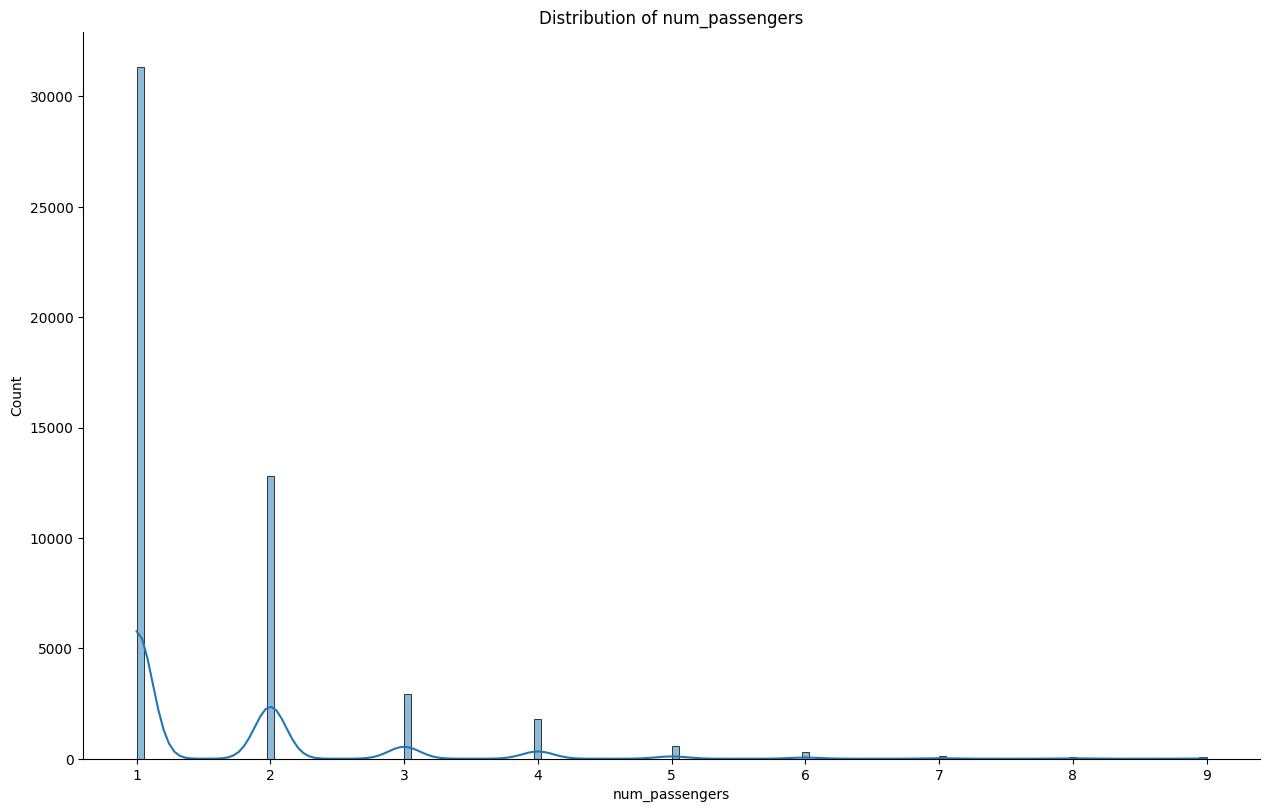

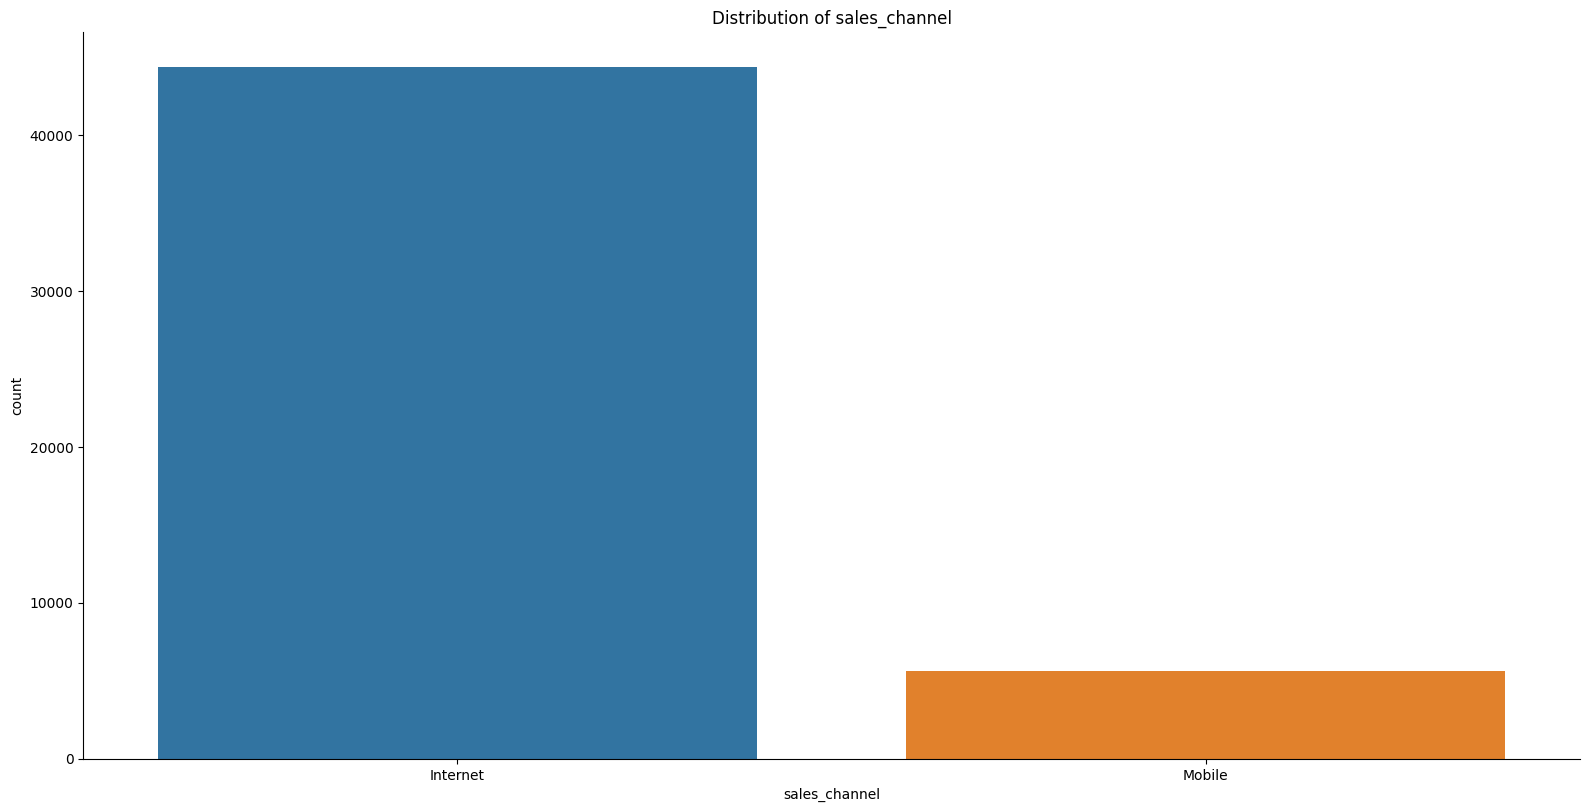

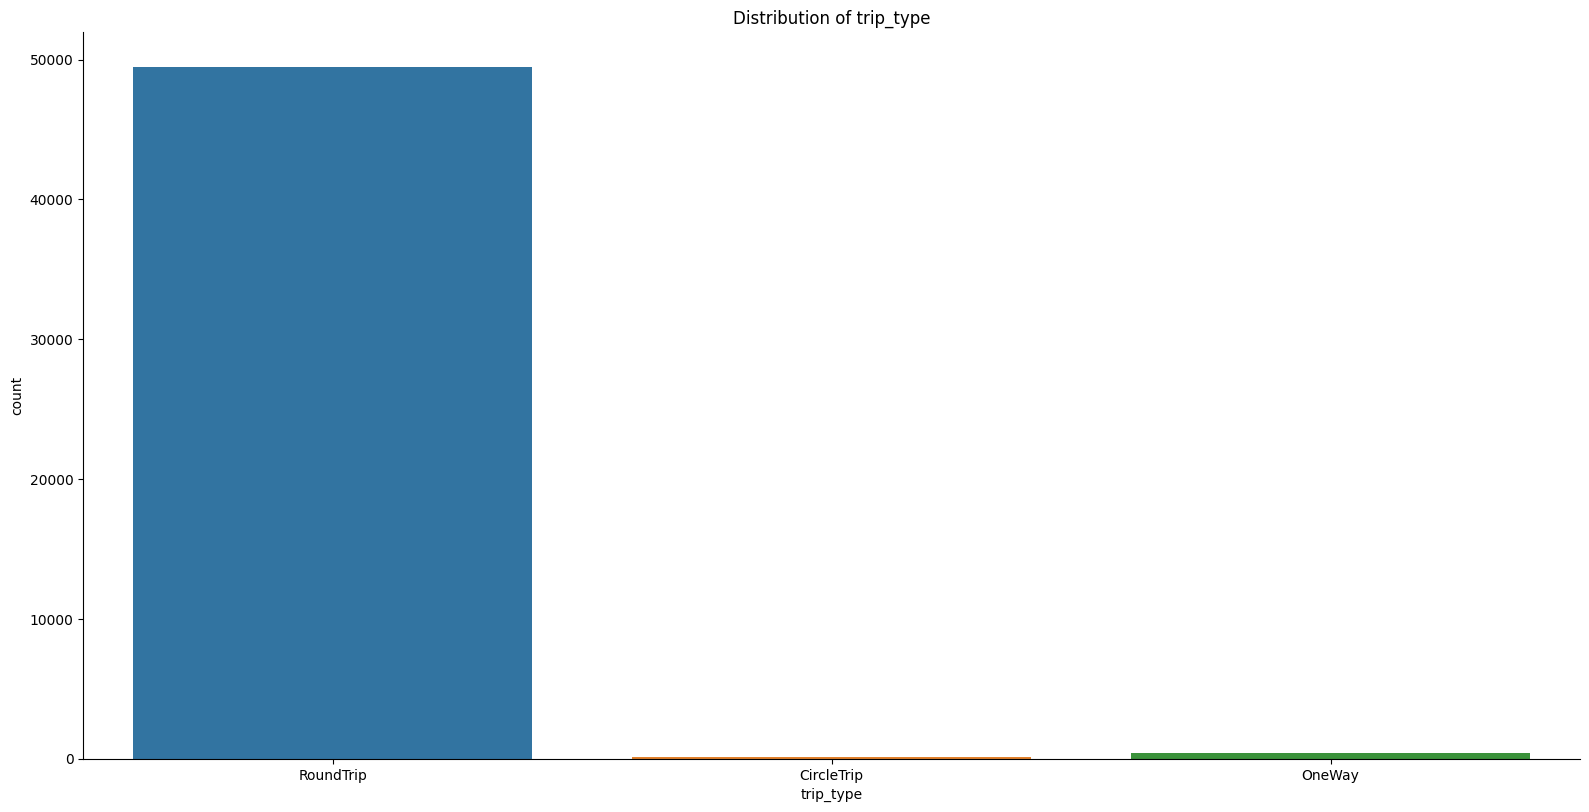

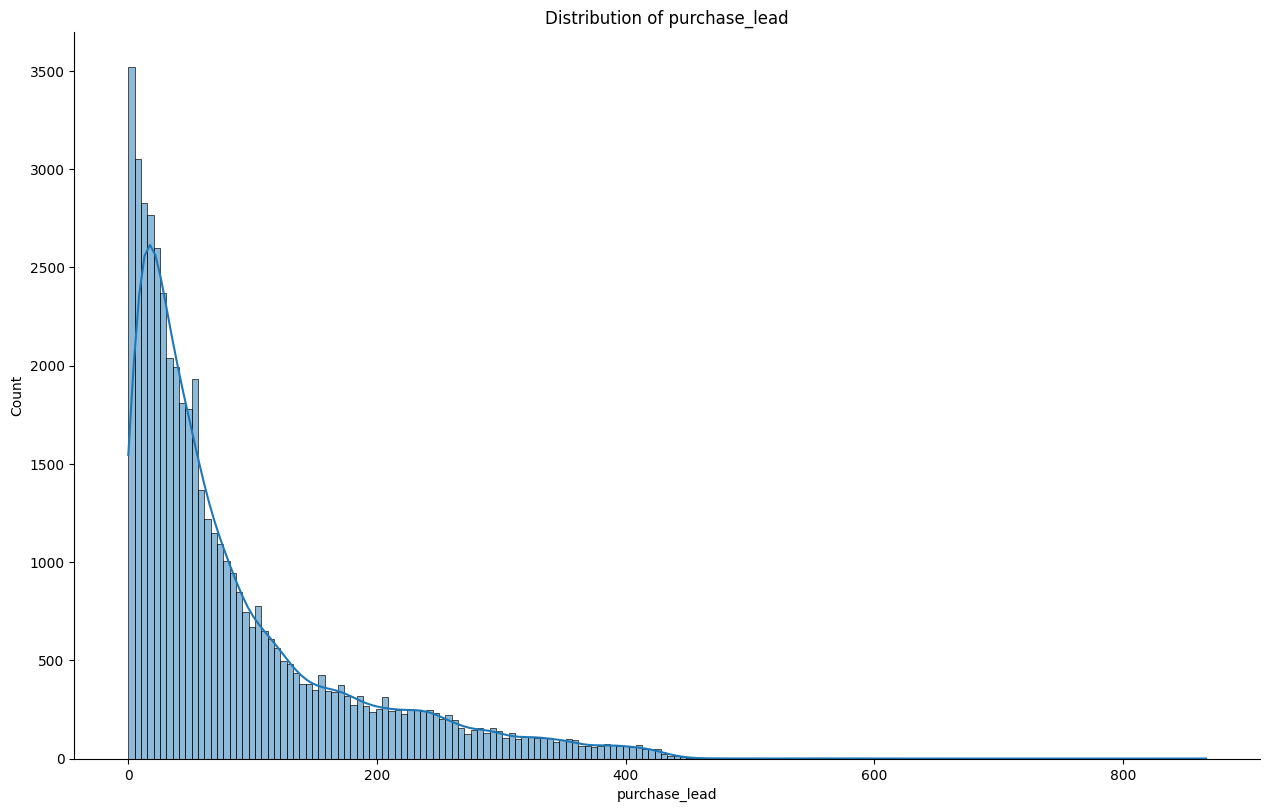

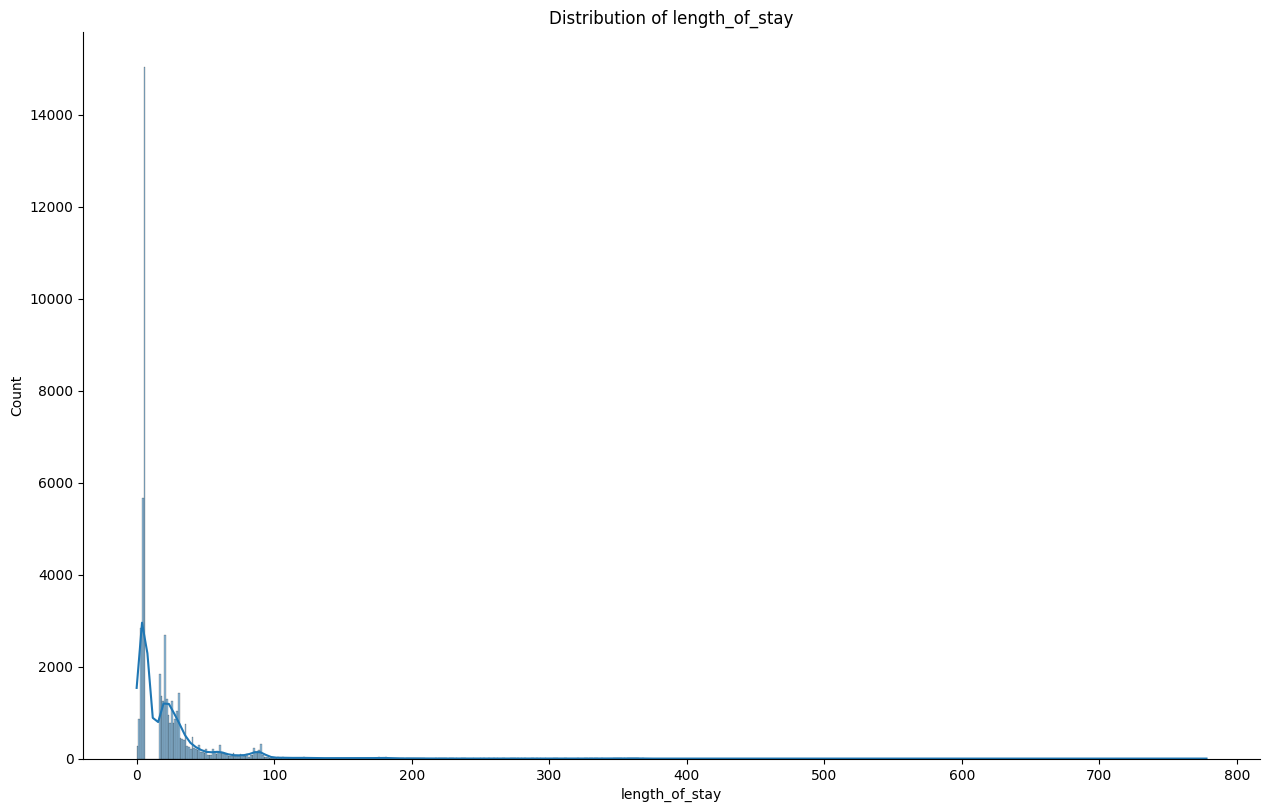

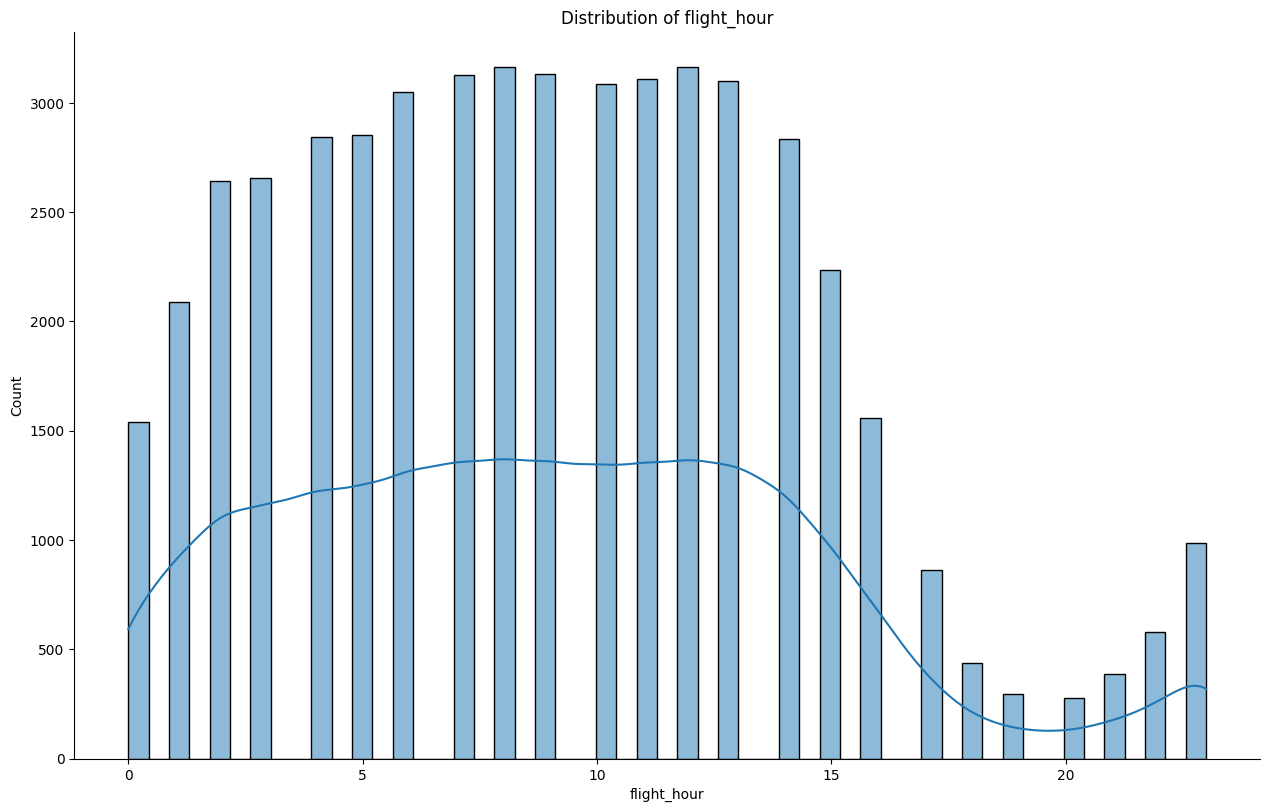

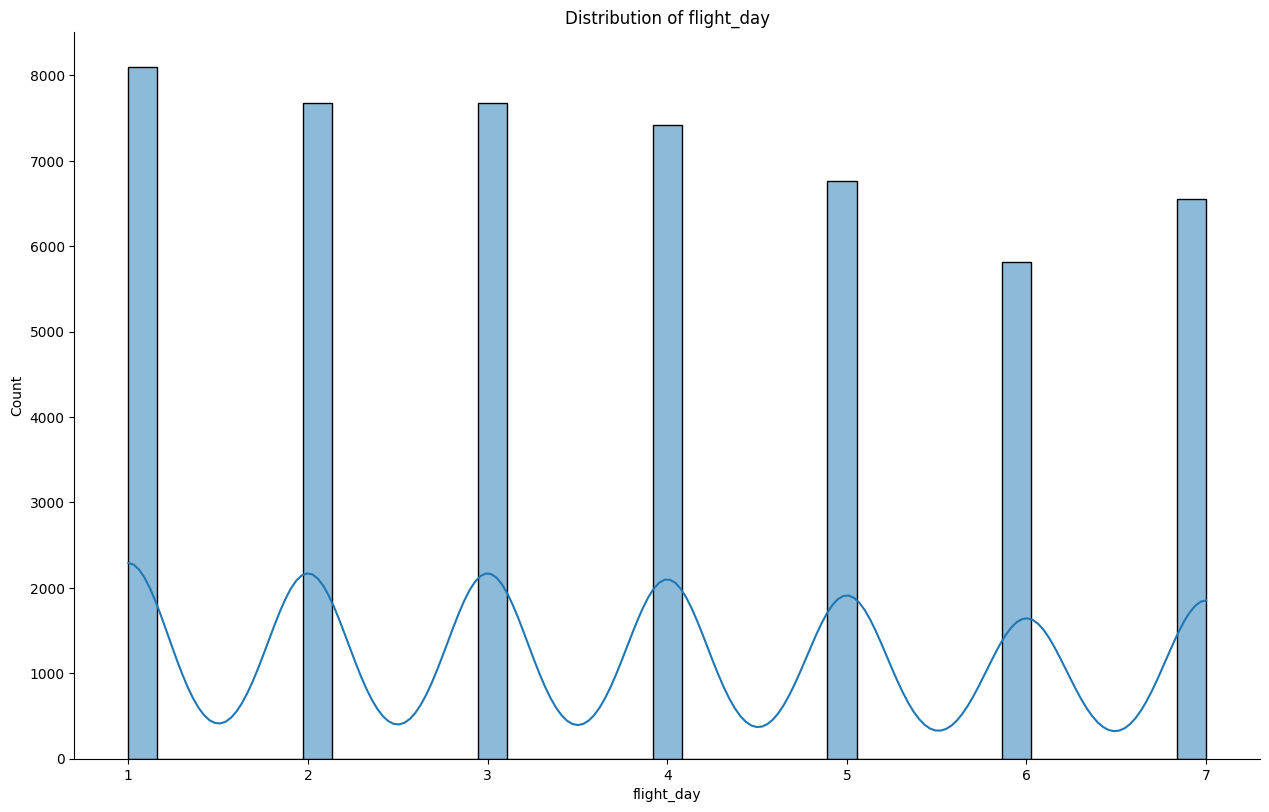

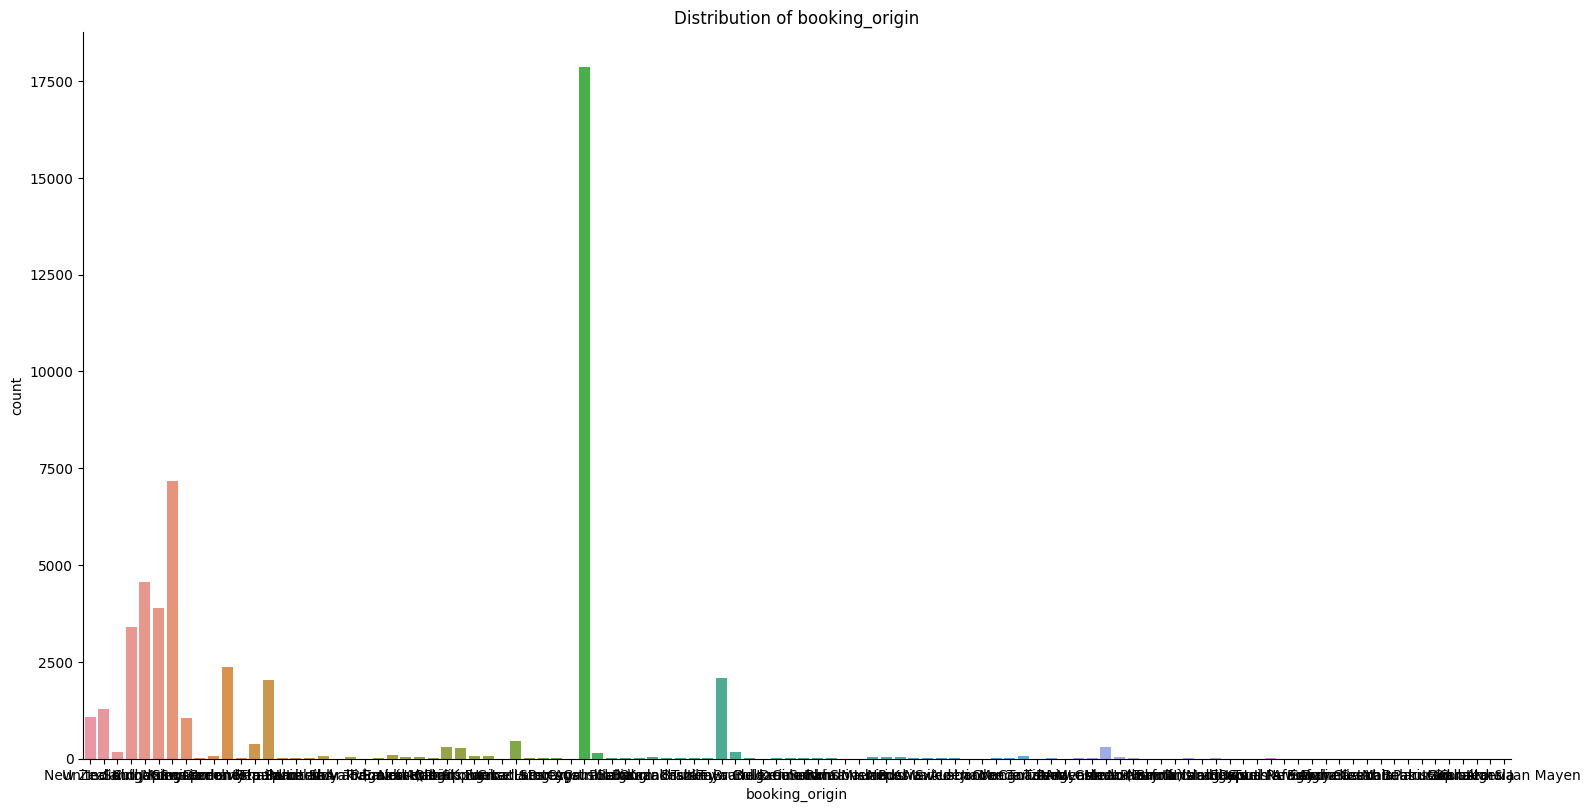

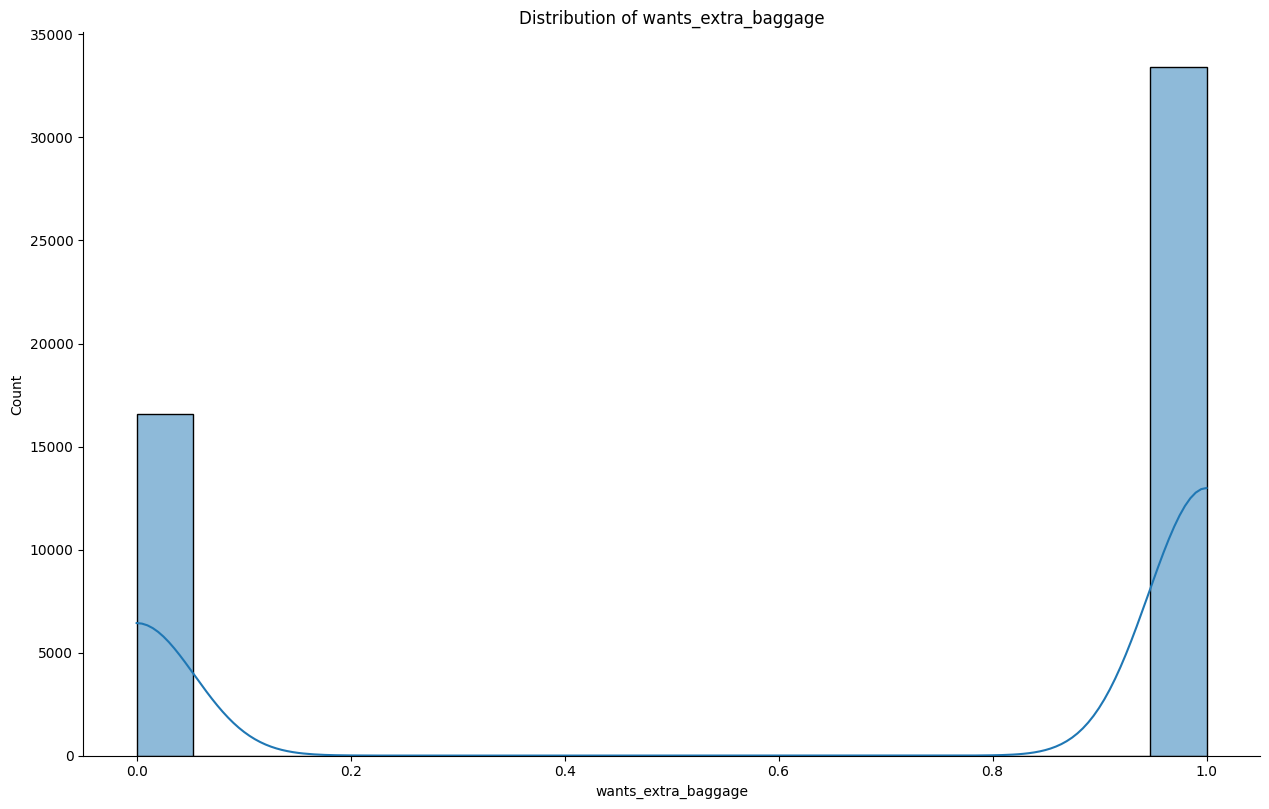

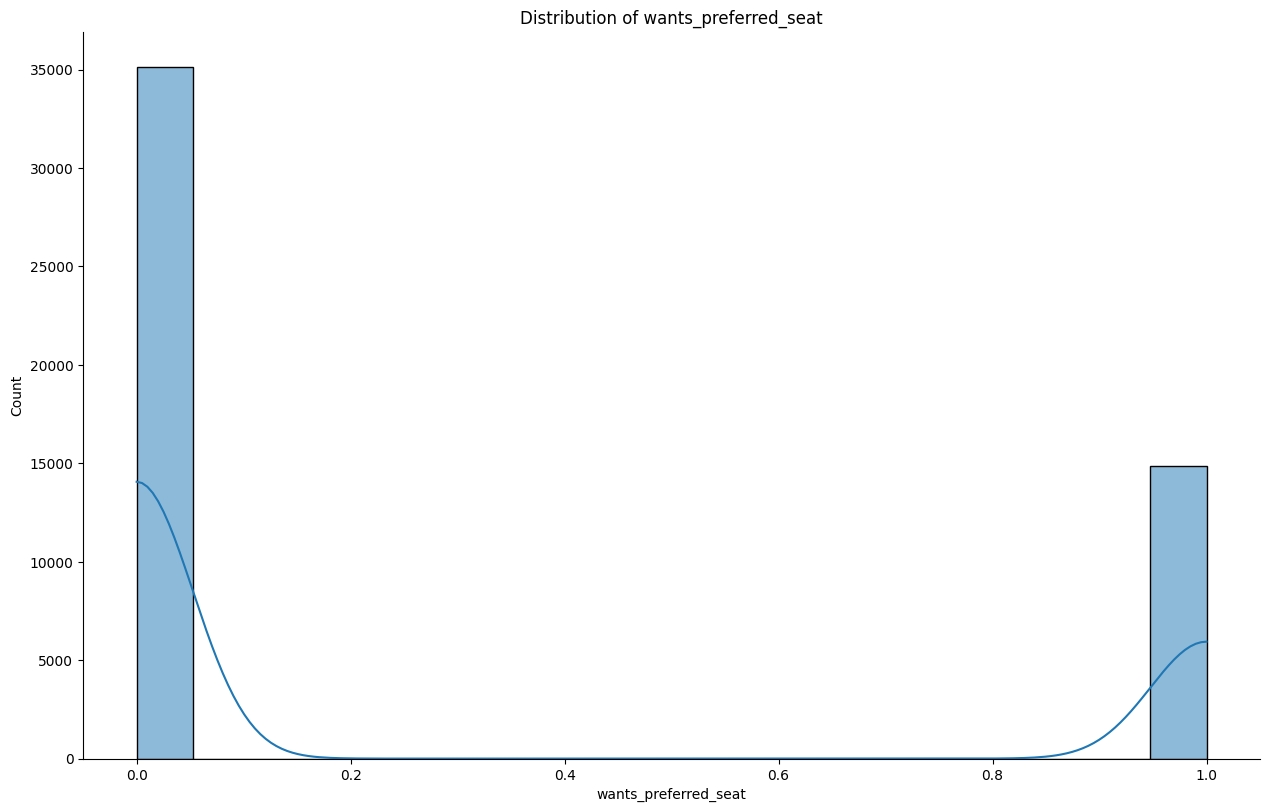

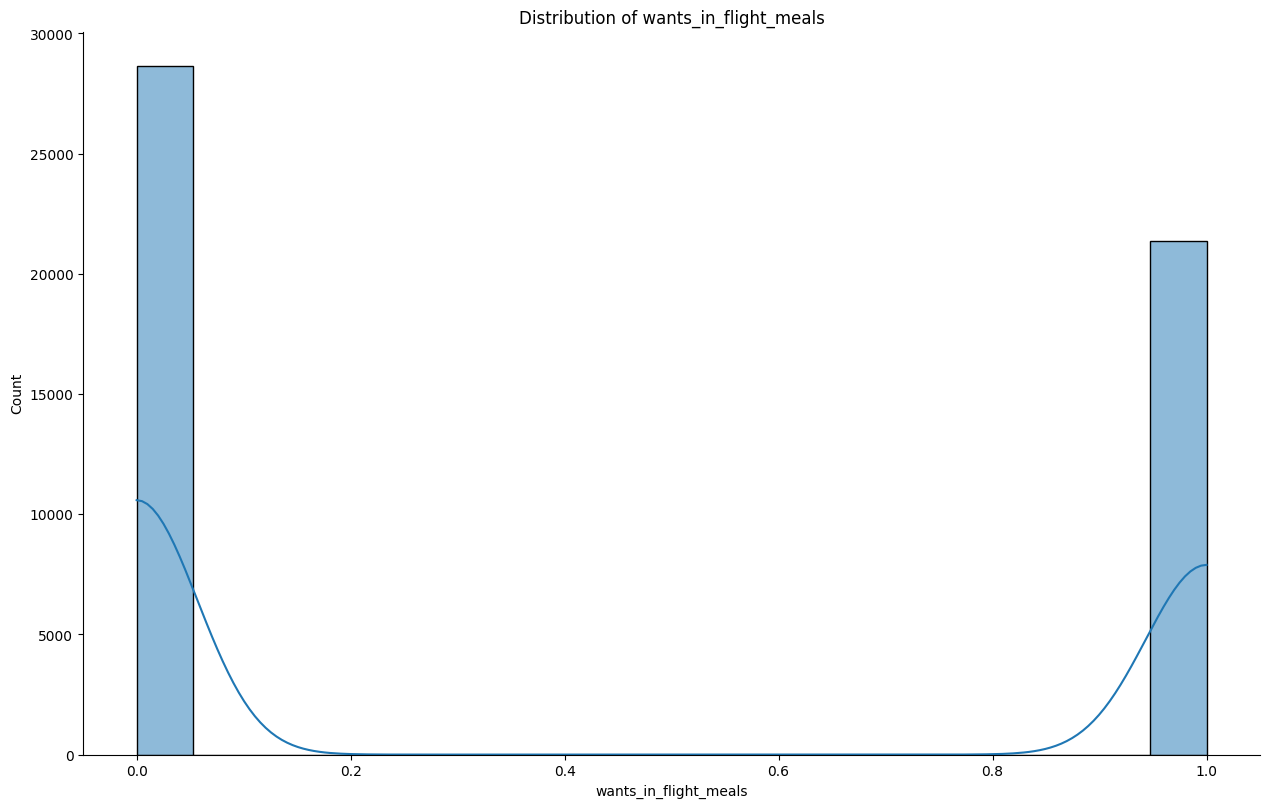

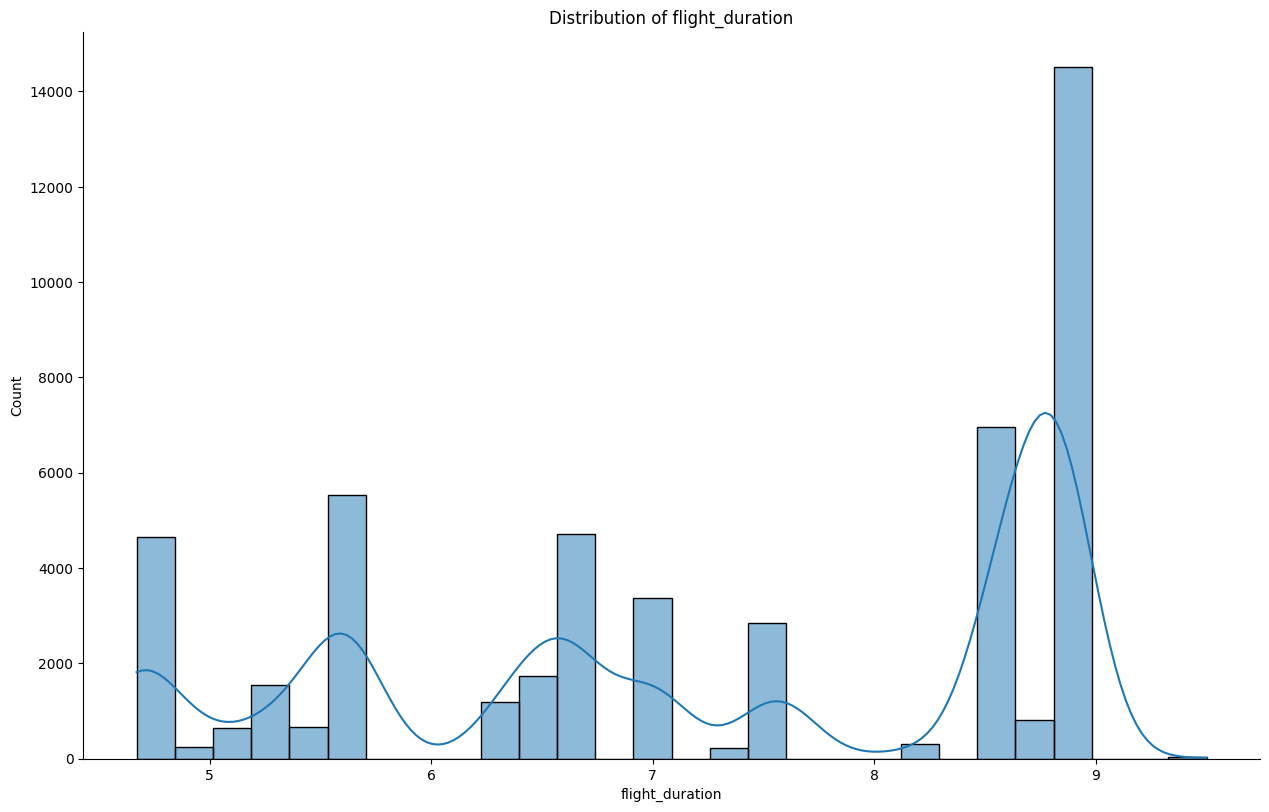

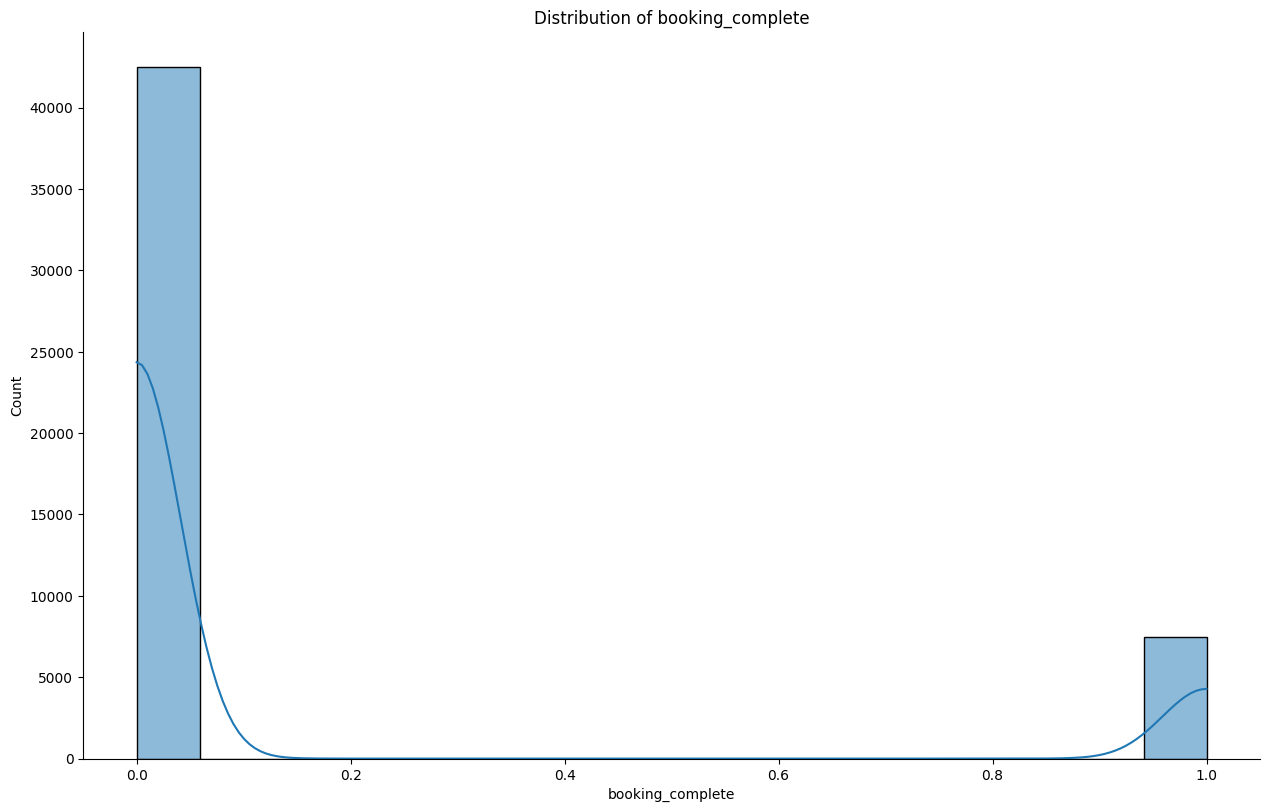

In [13]:
# Get Column names
colun_names = return_column_names(df)

for name in colun_names:
    print(name)
    stats_unique_values(df, name)

In [14]:
# Saving Datasett
df.to_csv('data/t2p1-customer_booking_mapped.csv', sep=",", index=False)